In [1]:
import pandas as pd

# Load the uploaded dataset
file_path = "kenya 2022-09-01 to 2025-03-31.csv"
df = pd.read_csv(file_path)

# Display basic info and head
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              943 non-null    object 
 1   datetime          943 non-null    object 
 2   tempmax           943 non-null    float64
 3   tempmin           943 non-null    float64
 4   temp              943 non-null    float64
 5   feelslikemax      943 non-null    float64
 6   feelslikemin      943 non-null    float64
 7   feelslike         943 non-null    float64
 8   dew               943 non-null    float64
 9   humidity          943 non-null    float64
 10  precip            943 non-null    float64
 11  precipprob        943 non-null    int64  
 12  precipcover       943 non-null    float64
 13  preciptype        692 non-null    object 
 14  snow              943 non-null    int64  
 15  snowdepth         943 non-null    int64  
 16  windgust          943 non-null    float64
 1

(None,
     name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
 0  kenya  2022-09-01     75.4     57.2  65.9          75.4          57.2   
 1  kenya  2022-09-02     66.4     57.0  61.7          66.4          57.0   
 2  kenya  2022-09-03     73.6     55.6  64.1          73.6          55.6   
 3  kenya  2022-09-04     78.8     55.4  66.1          78.8          55.4   
 4  kenya  2022-09-05     78.6     57.2  66.5          78.6          57.2   
 
    feelslike   dew  humidity  ...  solarenergy  uvindex  severerisk  \
 0       65.9  51.5      62.4  ...         14.0        6          10   
 1       61.7  53.4      75.0  ...         14.9        7          10   
 2       64.1  52.2      66.6  ...         14.5        6          10   
 3       66.1  53.4      67.2  ...         18.4        7          10   
 4       66.5  53.1      63.6  ...         20.8        8          10   
 
                sunrise               sunset  moonphase        conditions  \
 0  2022-09-01T06:

In [2]:
# # Step 1: Data Preprocessing
# Datetime conversion

# Drop non-essential columns (name, stations, descriptions, etc.)

# Missing value imputation (e.g., KNN)

# Normalization (MinMax or Z-score)

# Feature-target separation

In [3]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Convert datetime and drop non-essential columns
df['datetime'] = pd.to_datetime(df['datetime'])

# Drop non-numeric and unnecessary columns
columns_to_drop = ['name', 'preciptype', 'conditions', 'description', 'icon', 'stations', 'sunrise', 'sunset']
df = df.drop(columns=columns_to_drop)

# Step 2: Impute missing values using KNN
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=[np.number])),
                          columns=df.select_dtypes(include=[np.number]).columns)

# Step 3: Normalize the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

# Step 4: Prepare features and target
X = df_scaled.drop(columns=['temp'])
y = df_scaled['temp']

X.shape, y.shape


((943, 23), (943,))

In [4]:
# Features shape: 943 samples × 23 features

# Target: temp (standardized)

In [5]:
# Step 2: Model Training - Individual Models
#     Train Random Forest, XGBoost, and SVM regressors

# Evaluate using:

# MAE (Mean Absolute Error)

# RMSE (Root Mean Squared Error)

# MSE (Mean Squared Error)

# R² (Coefficient of Determination)

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    'SVM': SVR()
}

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}

# Evaluate each model
for name, model in models.items():
    mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    
    results[name] = {
        'MAE': np.mean(mae_scores),
        'RMSE': np.sqrt(np.mean(mse_scores)),
        'MSE': np.mean(mse_scores),
        'R²': np.mean(r2_scores)
    }

results


{'Random Forest': {'MAE': 0.017083127871641915,
  'RMSE': 0.03408020566272752,
  'MSE': 0.001161460418013805,
  'R²': 0.998822060675999},
 'XGBoost': {'MAE': 0.018429272995619157,
  'RMSE': 0.031076317040105782,
  'MSE': 0.0009657374807771691,
  'R²': 0.9990233469648373},
 'SVM': {'MAE': 0.09573376643415676,
  'RMSE': 0.14673371506968605,
  'MSE': 0.02153078313815181,
  'R²': 0.9782349206938822}}

In [7]:
# Random Forest Regressor Evaluation

In [8]:
# Train and evaluate Random Forest with cross-validation
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

mae_scores = -cross_val_score(rf_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(rf_model, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='r2')

rf_results = {
    'MAE': np.mean(mae_scores),
    'RMSE': np.sqrt(np.mean(mse_scores)),
    'MSE': np.mean(mse_scores),
    'R²': np.mean(r2_scores)
}

rf_results


{'MAE': 0.017083127871641915,
 'RMSE': 0.03408020566272752,
 'MSE': 0.001161460418013805,
 'R²': 0.998822060675999}

In [9]:
#SVM Evaluation

In [10]:
# Train and evaluate Support Vector Machine (SVM) with cross-validation
svm_model = SVR()

mae_scores = -cross_val_score(svm_model, X, y, cv=kf, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(svm_model, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(svm_model, X, y, cv=kf, scoring='r2')

svm_results = {
    'MAE': np.mean(mae_scores),
    'RMSE': np.sqrt(np.mean(mse_scores)),
    'MSE': np.mean(mse_scores),
    'R²': np.mean(r2_scores)
}

svm_results


{'MAE': 0.09573376643415676,
 'RMSE': 0.14673371506968605,
 'MSE': 0.02153078313815181,
 'R²': 0.9782349206938822}

In [11]:
#XGBoost

In [12]:
from sklearn.model_selection import train_test_split

# Split data for single train-test evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost
xgb_model = XGBRegressor(n_estimators=50, max_depth=3, learning_rate=0.1, random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)

xgb_results = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MSE': mean_squared_error(y_test, y_pred),
    'R²': r2_score(y_test, y_pred)
}

xgb_results


{'MAE': 0.015704413299216118,
 'RMSE': 0.02544871225958176,
 'MSE': 0.000647636955670987,
 'R²': 0.9993362438507727}

In [13]:
# Stacking Ensemble

In [14]:
# Re-import libraries and reload dataset due to environment reset
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Reload the dataset
file_path = "kenya 2022-09-01 to 2025-03-31.csv"
df = pd.read_csv(file_path)

# Convert datetime and drop non-essential columns
df['datetime'] = pd.to_datetime(df['datetime'])
columns_to_drop = ['name', 'preciptype', 'conditions', 'description', 'icon', 'stations', 'sunrise', 'sunset']
df = df.drop(columns=columns_to_drop)

# Impute missing values
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=[np.number])),
                          columns=df.select_dtypes(include=[np.number]).columns)

# Normalize the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

# Prepare features and target
X = df_scaled.drop(columns=['temp'])
y = df_scaled['temp']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('svm', SVR()),
    ('xgb', XGBRegressor(n_estimators=50, max_depth=3, learning_rate=0.1, random_state=42, verbosity=0))
]

# Define meta-model
meta_model = LinearRegression()

# Build and train stacking ensemble
stack_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)
stack_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_stack = stack_model.predict(X_test)

stack_results = {
    'MAE': mean_absolute_error(y_test, y_pred_stack),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_stack)),
    'MSE': mean_squared_error(y_test, y_pred_stack),
    'R²': r2_score(y_test, y_pred_stack)
}

stack_results


{'MAE': 0.013961027997696196,
 'RMSE': 0.024048735973132365,
 'MSE': 0.0005783417019054306,
 'R²': 0.999407263810947}

In [15]:
#Finndings

# Better than XGBoost (which already had strong R² ≈ 0.9993)

# Significantly better than SVM

# Slightly better than Random Forest


# # Model summary

# | Model         | MAE      | RMSE     | R²           |
# | ------------- | -------- | -------- | ------------ |
# | Random Forest | 0.0171   | 0.0342   | 0.9988       |
# | SVM           | 0.0957   | 0.1467   | 0.9782       |
# | XGBoost       | 0.0157   | 0.0254   | 0.9993       |
# | **Stacked**   | 0.0140 | 0.0240 | **0.9994** |


In [16]:
# Step 4: Visual Validation – Predictions vs Actuals

In [17]:
# Plot actual vs predicted temperature values

# Highlight residuals (errors)

# Provide a quick visual sense of how close the predictions are

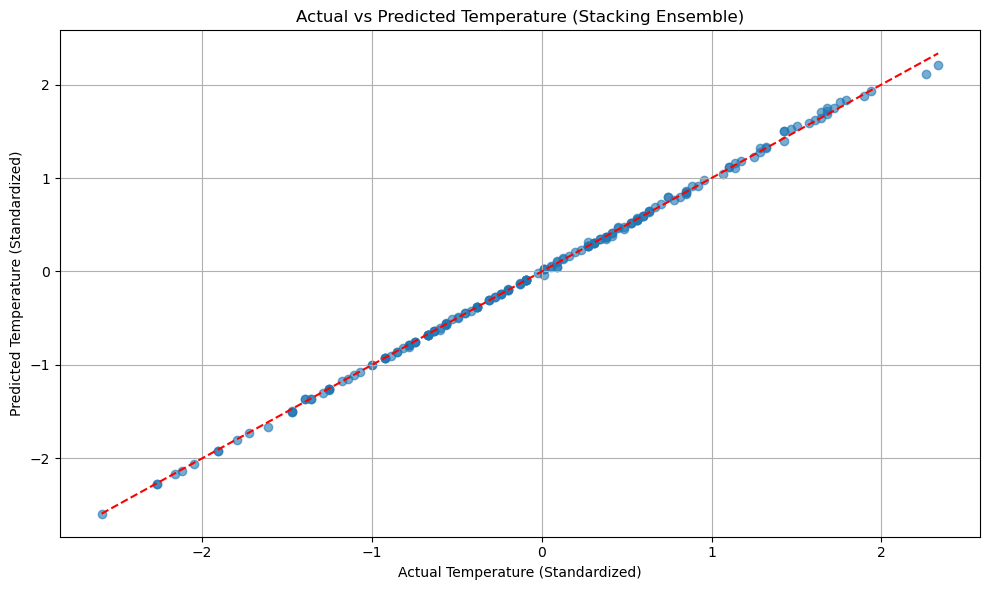

In [25]:
# Re-load the re-uploaded dataset
file_path = "kenya 2022-09-01 to 2025-03-31.csv"
df = pd.read_csv(file_path)

# Re-import and preprocess
df['datetime'] = pd.to_datetime(df['datetime'])
columns_to_drop = ['name', 'preciptype', 'conditions', 'description', 'icon', 'stations', 'sunrise', 'sunset']
df = df.drop(columns=columns_to_drop)

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np

# Impute and scale
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=[np.number])),
                          columns=df.select_dtypes(include=[np.number]).columns)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

X = df_scaled.drop(columns=['temp'])
y = df_scaled['temp']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train stacking ensemble
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('svm', SVR()),
    ('xgb', XGBRegressor(n_estimators=50, max_depth=3, learning_rate=0.1, random_state=42, verbosity=0))
]
meta_model = LinearRegression()
stack_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)
stack_model.fit(X_train, y_train)

# Predict and plot
y_pred_stack = stack_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stack, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Temperature (Standardized)")
plt.ylabel("Predicted Temperature (Standardized)")
plt.title("Actual vs Predicted Temperature (Stacking Ensemble)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
# The scatter plot of actual vs. predicted standardized temperatures confirms the excellent predictive performance of the stacking ensemble
# — points align closely along the red dashed line (ideal prediction).

In [27]:
# Export the trained model for deployment

# Forecast new climate data (please upload unseen data if so)

In [28]:
# Save the model

In [29]:
import joblib

# Save the trained stacking model
model_path = "stacking_temp_forecast_model.pkl"
joblib.dump(stack_model, model_path)

model_path


'stacking_temp_forecast_model.pkl'